In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Social_Network_Ads.csv')

In [3]:
data.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [4]:
data.sample(15)

,User ID,Gender,Age,EstimatedSalary,Purchased
245,15722061,Female,51,146000,1
393,15635893,Male,60,42000,1
54,15654901,Female,27,58000,0
357,15671387,Female,41,72000,0
120,15811613,Female,36,75000,0
24,15705113,Male,46,23000,1
348,15579212,Male,39,77000,0
11,15606274,Female,26,52000,0
116,15679297,Male,35,75000,0
365,15807525,Female,59,29000,1


In [5]:
data.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [6]:
data['Gender'].replace(('Male', 'Female'), (1,0), inplace=True)
data['Gender'].astype('int')

0      1
1      1
2      0
3      0
4      1
      ..
395    0
396    1
397    0
398    1
399    0
Name: Gender, Length: 400, dtype: int32

<Axes: >

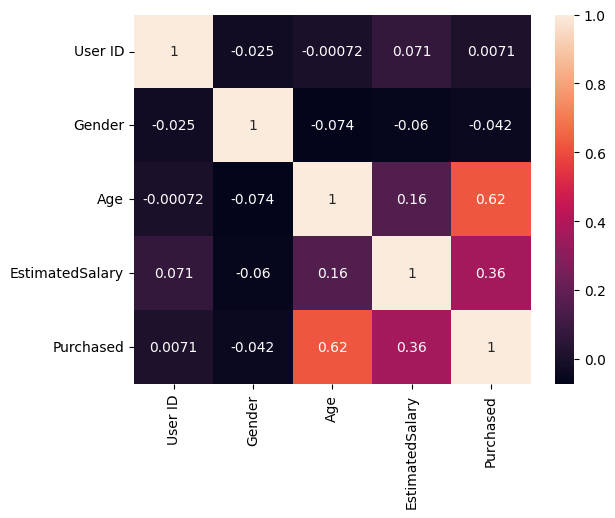

In [7]:
sns.heatmap( data.corr(), annot=True )

<Axes: xlabel='Age', ylabel='Purchased'>

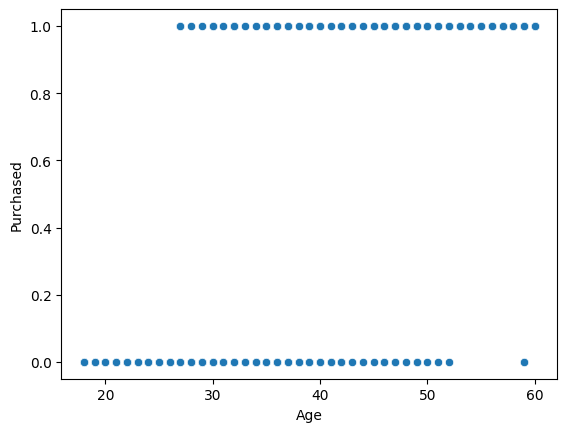

In [8]:
sns.scatterplot(data=data, x='Age', y='Purchased')

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [10]:
X = data['Age'].values.reshape(-1,1)
Y = data['Purchased']

In [11]:
model = LogisticRegression()
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [12]:
model.fit(X_train, Y_train)

LogisticRegression()

In [13]:
prediction = model.predict(X_test)
print(prediction)

[1 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 0 0 0
 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0
 1 0 1 0 0 0]


In [14]:
score = model.score(X_test, Y_test)
print(score)

0.875


In [15]:
meanSqr2 = mean_squared_error(Y_test,prediction)
print(meanSqr2)

0.125


<Axes: >

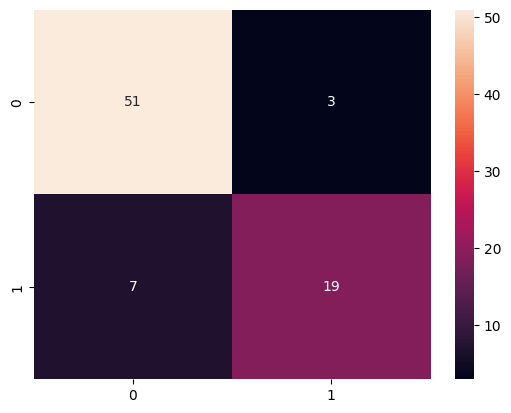

In [16]:
conMat = confusion_matrix(Y_test, prediction)
sns.heatmap(conMat, annot=True)

In [17]:
print('Accuracy :', accuracy_score(Y_test, prediction))
print('Precision :', precision_score(Y_test, prediction))
print('Recall Score :', recall_score(Y_test, prediction))
print('F1 Score :', f1_score(Y_test, prediction))

Accuracy : 0.875
Precision : 0.8636363636363636
Recall Score : 0.7307692307692307
F1 Score : 0.7916666666666666


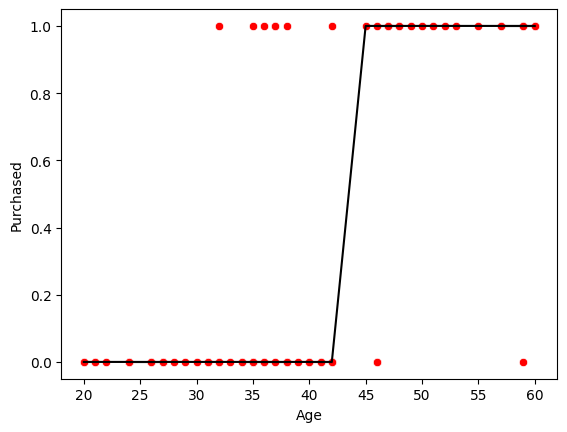

In [18]:
sns.scatterplot(x=X_test.squeeze(), y=Y_test, color='Red')
sns.lineplot(x=X_test.squeeze(), y=prediction, color='Black')

plt.xlabel('Age')
plt.show()